In [2]:
import pandas as pd
import numpy as np
from scipy.io import loadmat, savemat
import matplotlib.pyplot as plt
import h5py
import cv2
import pickle

In [2]:
h5 = h5py.File('../data/nyu_depth_v2_labeled.mat', 'r')
print(h5.keys())

<KeysViewHDF5 ['#refs#', '#subsystem#', 'accelData', 'depths', 'images', 'instances', 'labels', 'names', 'namesToIds', 'rawDepthFilenames', 'rawDepths', 'rawRgbFilenames', 'sceneTypes', 'scenes']>


In [3]:
depths = h5.get('depths').value
depths.shape

/home/ec2-user/miniconda3/envs/gluon/lib/python3.6/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


(1449, 640, 480)

In [4]:
images = h5.get('images').value
images.shape

(1449, 3, 640, 480)

In [5]:
depths = depths.transpose(0, 2, 1)
images = images.transpose(0, 3, 2, 1)

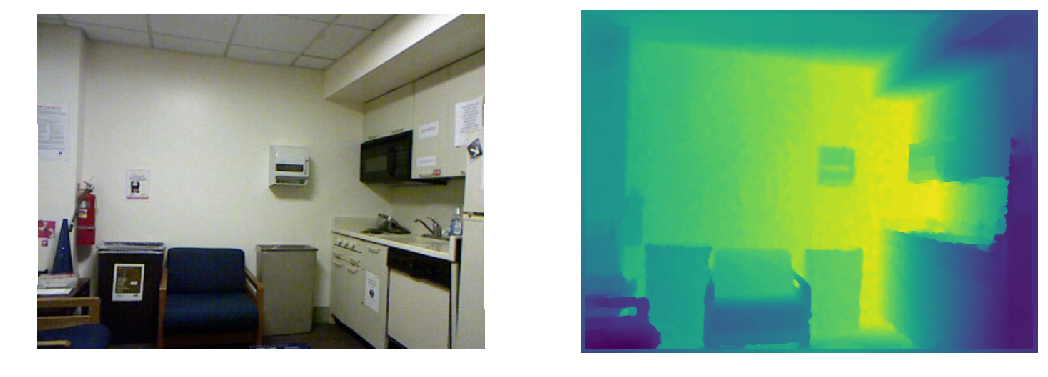

In [62]:
sample_img = 0
plt.figure(figsize=(18, 14))
plt.subplot(121)
plt.imshow(images[sample_img])
plt.axis('off')
plt.subplot(122)
plt.imshow(depths[sample_img])
plt.axis('off');

In [54]:
def convert_depth(gray, cm='jet'):
    cmap = plt.get_cmap(cm)
    
    rgba_img = cmap(gray / np.max(gray))
    rgb_img = np.delete(rgba_img, 3, 2)
    
    return rgb_img

In [65]:
rgb_depths = [convert_depth(img) for img in depths]

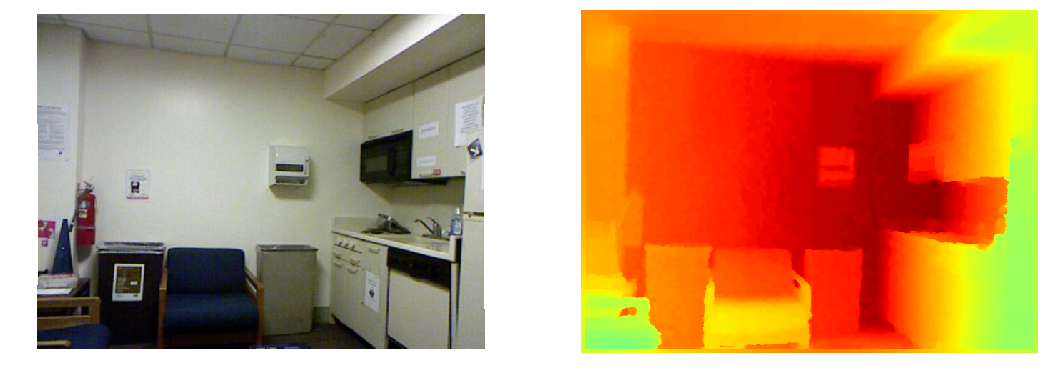

In [66]:
sample_img = 0
plt.figure(figsize=(18, 14))
plt.subplot(121)
plt.imshow(images[sample_img])
plt.axis('off')
plt.subplot(122)
plt.imshow(rgb_depths[sample_img])
plt.axis('off');

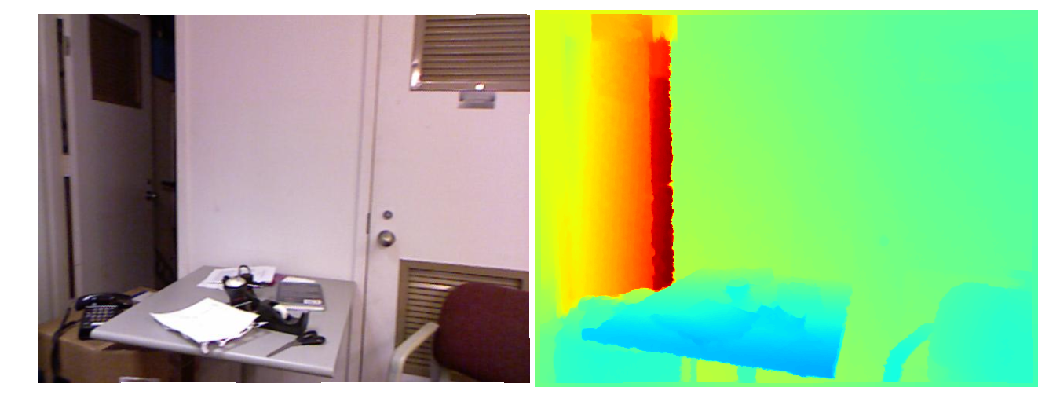

In [79]:
sample_img = 3
plt.figure(figsize=(18, 14))
plt.imshow(np.concatenate([images[sample_img] / 255., rgb_depths[sample_img]], axis=1))
plt.axis('off');

In [91]:
concat_imgs = np.concatenate([images / 255., rgb_depths], axis=2)

MemoryError: 

In [94]:
concat_imgs = np.empty((images.shape[0], images.shape[1], images.shape[2] * 2, images.shape[3]))
for i in range(images.shape[0]):
    concat_imgs[i] = np.concatenate([images[i] / 255., rgb_depths[i]], axis=1)

In [100]:
with open('concat_imgs.pkl', 'wb') as file:
    pickle.dump(concat_imgs, file)

MemoryError: 